# Install FiftyOne libraries

To install fiftyOne, you can use a pip install command:

pip install fiftyone or pip install fiftyone[desktop] to install the desktop app as well. Use the first option.

Use a conda environment separate for fiftyone

In [1]:
import fiftyone as fo
import fiftyone.brain as fob
from fiftyone import ViewField as F


In [4]:
name = "dataset-name" # Name of dataset, note, there will be an error which may show up in the next code block which says dataset name not found, just change the name again to anything and it will work.
dataset_dir = "/path/to/dataset" # Path to dataset

new_images_dir = "/path/to/new/directory/" # Path to new folder where images without duplicates will be stored
labels_dir = "/path/to/labels" # Path to folder where labels all labels with duplicates are stored

Dataset path:

This is for the image dataset:
Foldername -> image1.ext, image2.ext

This is for the annotation dataset, will contain the bounding box information:
Foldername -> image1.txt, image2.txt

<b> Note: The image and annotation dataset should be separate folders. </b>

In [5]:
# Create the dataset
dataset = fo.Dataset.from_dir(
    dataset_dir=dataset_dir,
    dataset_type=fo.types.ImageDirectory, # Or ImageClassificationDirectoryTree for classification dataset
    name=name,
)

print(dataset)

 100% |███████████████████| 19/19 [21.1ms elapsed, 0s remaining, 900.9 samples/s]     
Name:        my-full
Media type:  image
Num samples: 19
Persistent:  False
Tags:        []
Sample fields:
    id:       fiftyone.core.fields.ObjectIdField
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)


In [7]:
print(dataset.head(18))

[<Sample: {
    'id': '645b83faa730768b9742a82e',
    'media_type': 'image',
    'filepath': '/home/intern/Desktop/fiftyone_test/test_folder/0ad5583f-Screenshot_from_2022-09-28_14-18-26_cleanup1.jpeg',
    'tags': [],
    'metadata': None,
}>, <Sample: {
    'id': '645b83faa730768b9742a82f',
    'media_type': 'image',
    'filepath': '/home/intern/Desktop/fiftyone_test/test_folder/25628053-Screenshot_from_2022-09-28_14-42-47_cleanup.jpeg',
    'tags': [],
    'metadata': None,
}>, <Sample: {
    'id': '645b83faa730768b9742a830',
    'media_type': 'image',
    'filepath': '/home/intern/Desktop/fiftyone_test/test_folder/5815f7ee-Screenshot_from_2022-09-28_12-00-33_cleanup.png',
    'tags': [],
    'metadata': None,
}>, <Sample: {
    'id': '645b83faa730768b9742a831',
    'media_type': 'image',
    'filepath': '/home/intern/Desktop/fiftyone_test/test_folder/59b1978f-Screenshot_from_2022-09-28_14-43-58_cleanup.png',
    'tags': [],
    'metadata': None,
}>, <Sample: {
    'id': '645b83faa7

In [8]:
fob.compute_uniqueness(dataset) # Compute uniqueness of dataset image samples

print(dataset)

Computing embeddings...
 100% |███████████████████| 19/19 [427.1ms elapsed, 0s remaining, 44.5 samples/s]     
Computing uniqueness...
Uniqueness computation complete
Name:        my-full
Media type:  image
Num samples: 19
Persistent:  False
Tags:        []
Sample fields:
    id:         fiftyone.core.fields.ObjectIdField
    filepath:   fiftyone.core.fields.StringField
    tags:       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    uniqueness: fiftyone.core.fields.FloatField


In [9]:
# View a sample from the dataset
print(dataset.first())

<Sample: {
    'id': '645b83faa730768b9742a82e',
    'media_type': 'image',
    'filepath': '/home/intern/Desktop/fiftyone_test/test_folder/0ad5583f-Screenshot_from_2022-09-28_14-18-26_cleanup1.jpeg',
    'tags': [],
    'metadata': None,
    'uniqueness': 0.9206241333312318,
}>



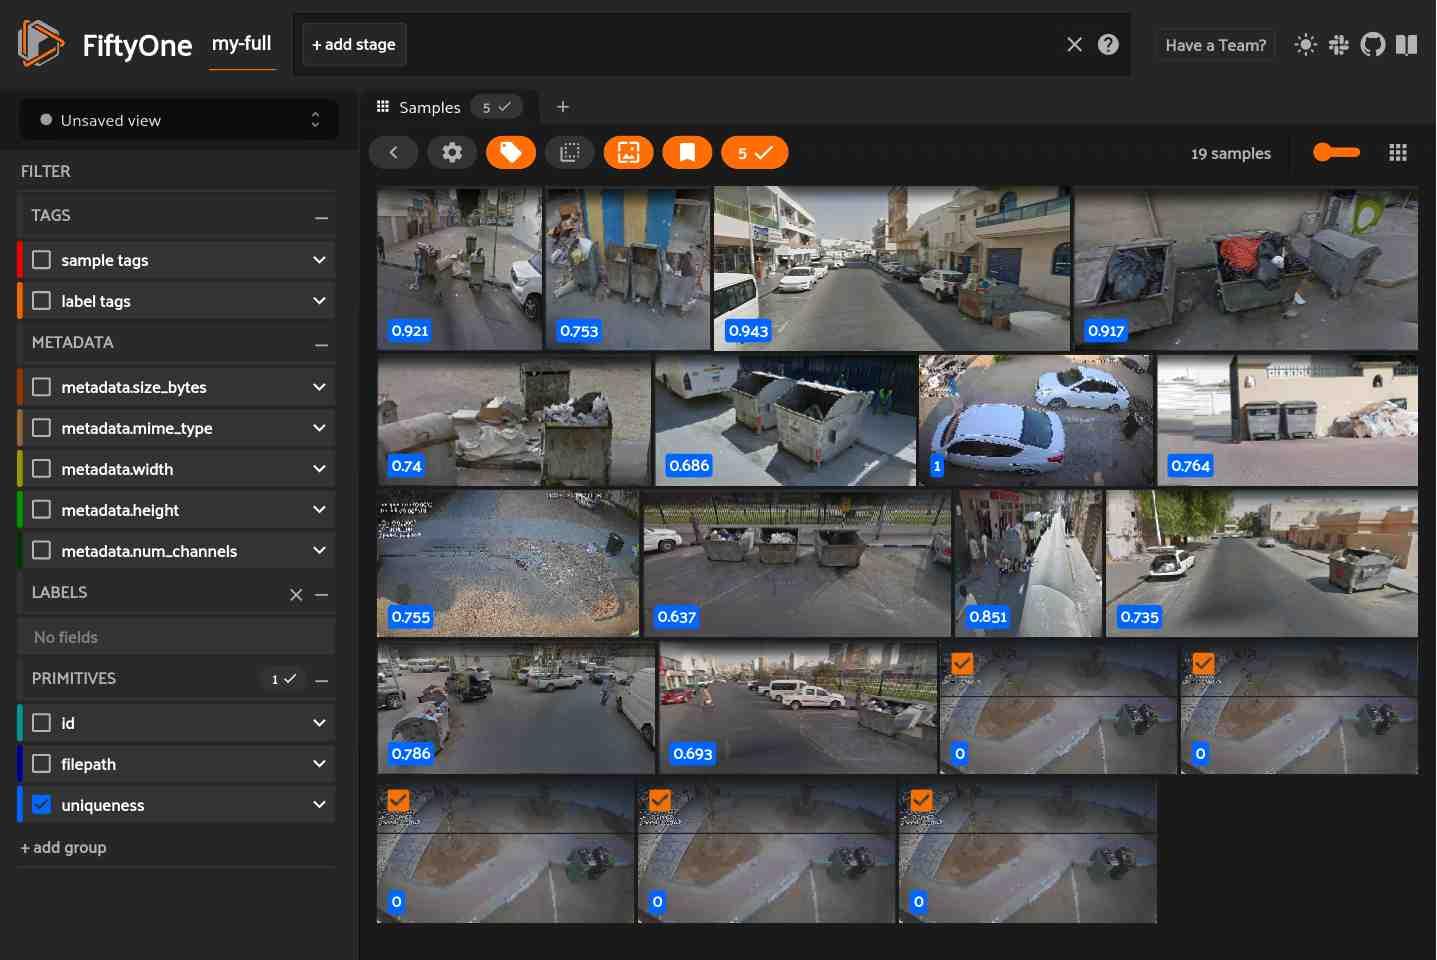

In [10]:
# View dataset in the App
session = fo.launch_app(dataset)

The duplicates must be selected based on the uniqueness. If the uniqueness is 0, those will be duplicates and need to be selected in the fiftyone application.

In [11]:
# Get currently selected images from App
dup_ids = session.selected
print(dup_ids)

# Get view containing selected samples
dups_view = dataset.select(dup_ids)

# Mark as duplicates
for sample in dups_view:
    sample.tags.append("duplicate")
    sample.save()

['645b83faa730768b9742a83c', '645b83faa730768b9742a83d', '645b83faa730768b9742a840', '645b83faa730768b9742a83f', '645b83faa730768b9742a83e']


You can visualize the duplicates separately in the fiftyone application.

In [12]:
# Select samples with `duplicate` tag
dups_tag_view = dataset.match_tags("duplicate")

# Open view in App
session.view = dups_tag_view

Use the code block below to export to a new folder with the duplicates removed.

In [14]:
# Get samples that do not have the `duplicate` tag
no_dups_view = dataset.match(~F("tags").contains("duplicate"))

# Export dataset to disk as a classification directory tree
no_dups_view.export(
    new_images_dir,
    fo.types.ImageDirectory
)

Directory '/home/intern/Desktop/fiftyone_test/de_duplicate_dataset' already exists; export will be merged with existing files
 100% |███████████████████| 14/14 [15.2ms elapsed, 0s remaining, 923.1 samples/s] 


Use the below code to check if the labels and images match. If the label does not match the image, it will be removed. This will help filter out the duplicate annotations from the image dataset.

In [15]:
import os
import shutil

# Get a list of all image filenames
image_filenames = [os.path.splitext(filename)[0] for filename in os.listdir(new_images_dir)]

# Iterate over label filenames
for label_filename in os.listdir(labels_dir):
    # Get the corresponding image filename
    image_filename = os.path.splitext(label_filename)[0]
    # Check if the label filename matches an image filename
    if image_filename not in image_filenames:
        # Delete the label file
        label_path = os.path.join(labels_dir, label_filename)
        os.remove(label_path)
